In [1]:
#@title Define if we are on Colab and mount drive { display-mode: "form" }
run_params = {}
try:
  from google.colab import drive
  drive.mount('/content/gdrive')
  run_params['IN_COLAB'] = True
except:
  run_params['IN_COLAB'] = False

In [2]:
#@title (COLAB ONLY) Clone GitHub repo { display-mode: "form" }

if run_params['IN_COLAB']:
  !git clone https://github.com/lluissalord/radiology_ai.git

  %cd radiology_ai

In [8]:
#@title Setup environment and Colab general variables { display-mode: "form" }
# %%capture
%run colab_conda_setup.ipynb

In [4]:
import pandas as pd
import os

from fastai.basics import *
from fastai.medical.imaging import *

In [5]:
from preprocessing.dicom import *
from organize.dicom import *

In [9]:
metadata_raw_path = os.path.join(run_params['PATH_PREFIX'], 'metadata_raw.csv')

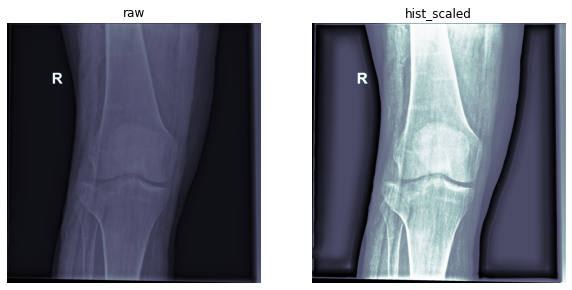

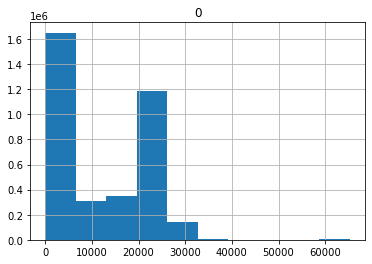

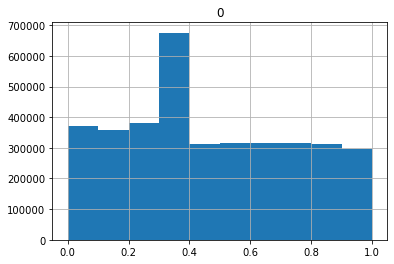

In [12]:
# dcms = L([run_params['RAW_FOLDER'] + '/03010001140473/44EIARL2F5R93e6KUKCGCH0T5QBG41D06V8N940P0ALE12N6M6UDE']).map(dcmread)
dcms = L([get_files("sources/AAA")[0]]).map(dcmread)
dcm = dcms[0]
scales = False, True
titles = 'raw','hist_scaled'
for s,a,t in zip(scales, subplots(1,2,imsize=5)[1].flat, titles):
    dcm.show(scale=s, ax=a, title=t);
pd.DataFrame(dcm.pixel_array.reshape(-1)).hist();
pd.DataFrame(dcm.hist_scaled().reshape(-1)).hist();

In [6]:
fnames = get_files(run_params['ORGANIZE_FOLDER'], extensions='.dcm')
fnames = L(filter_fnames(fnames, metadata_raw_path))

n_samples = 50 # None

dataset = DCMPreprocessDataset(fnames=fnames, padding_to_square=True, resize=None)
bins = dataset.init_bins(n_samples=n_samples)
# dataset.bins = bins

dataset.save(run_params['PREPROCESS_FOLDER'])

In [78]:
raw_fnames = get_files(run_params['RAW_FOLDER'])
raw_filtered_fnames = L(filter_fnames(raw_fnames, metadata_raw_path))

from glob import glob
import os
others_fnames = L(glob(os.path.join(run_params['RAW_FOLDER'], "Anonymized*","*.dcm")))
other_fnames_from_raw = [raw_fname for raw_fname in raw_fnames if str(raw_fname) in others_fnames]

dataset = DCMPreprocessDataset(fnames=other_fnames_from_raw, padding_to_square=True, resize=512)

dataset.save(run_params['RAW_PREPROCESS_FOLDER'], overwrite=False, keep=True, clean_folder=False)
# RuntimeError: The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )

Saving Images: 100%|██████████| 739/739 [07:16<00:00,  1.69it/s]


In [13]:
raw_fnames = get_files("sources/AAA")
# raw_filtered_fnames = L(filter_fnames(raw_fnames, metadata_raw_path))

dataset = DCMPreprocessDataset(fnames=raw_fnames, padding_to_square=True, resize=512)

dataset.save("sources/AAA/preprocess", overwrite=False, keep=True, clean_folder=False)

Saving Images: 100%|██████████| 73/73 [00:19<00:00,  3.71it/s]
